In [27]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from make_dataset import renamed_columns_en, process_raw, clean_na, make_dataset, abbreviation
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
#bring in the six packs
df_train = pd.read_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/south.csv')

In [29]:
abs = abbreviation
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [30]:
#changing column names
if len(abs)<27:
    abs.insert(0, "index")
df_train.columns = abs
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [31]:
num_rows = len(df_train['tmax'])

In [32]:
df_train.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

In [33]:
df_train.replace(-9999, np.nan, inplace=True)

In [34]:
new_df = pd.DataFrame({col: [] for col in abbreviation})
new_df.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

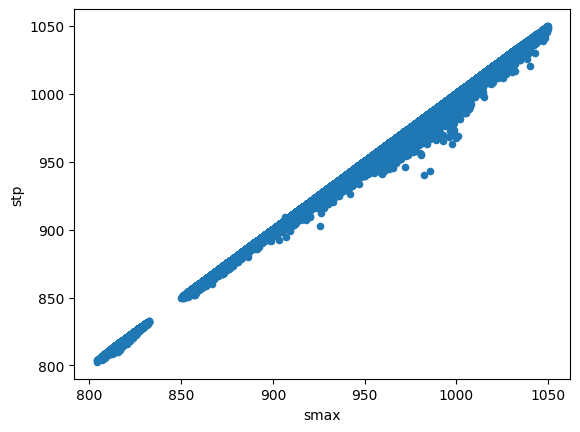

In [35]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([df_train['stp'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='stp');

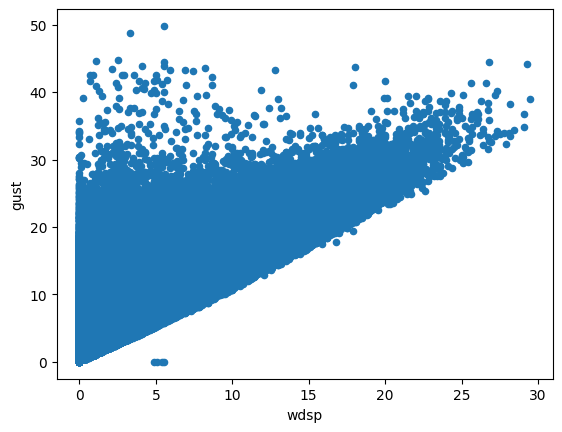

In [36]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([df_train['gust'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [37]:
gust_out_liers = []
for i in range(num_rows):
    y = df_train['gust'][i]
    x = df_train['wdsp'][i]
    if y > 40:
        gust_out_liers.append(i)
    elif y < x - 3:
        gust_out_liers.append(i)

new_df = df_train.drop(gust_out_liers)
new_df = new_df.reset_index(drop=True)


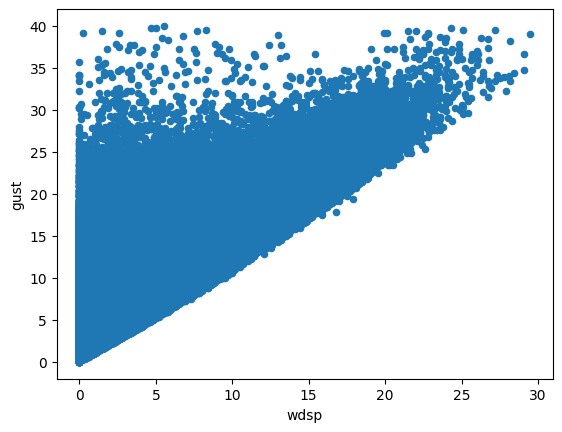

In [38]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([new_df['gust'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='gust');

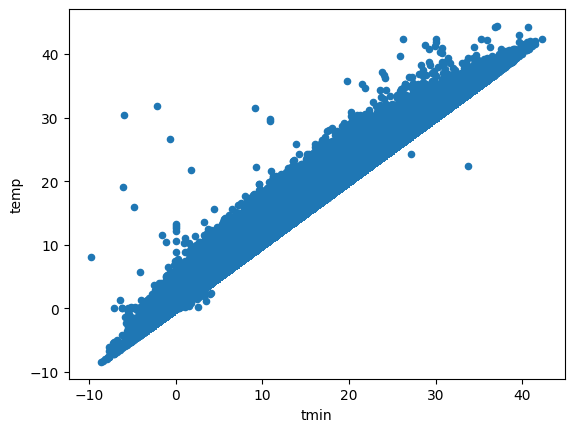

In [39]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

In [40]:
temp_tmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['temp'][i]
    x = new_df['tmin'][i]
    if y > x + 18:
        temp_tmin_out_liers.append(i)
    elif y < x - 2:
        temp_tmin_out_liers.append(i)

new_df = new_df.drop(temp_tmin_out_liers)
new_df = new_df.reset_index(drop=True)

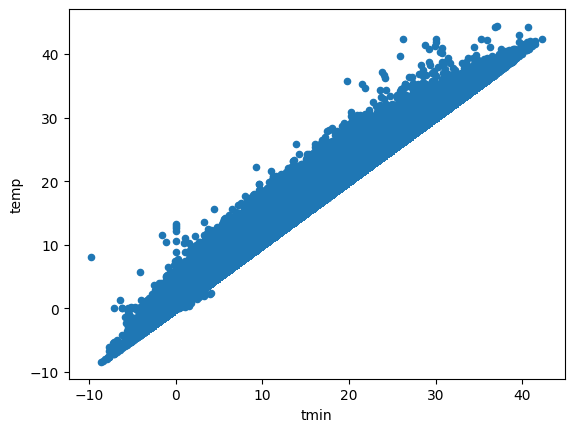

In [41]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

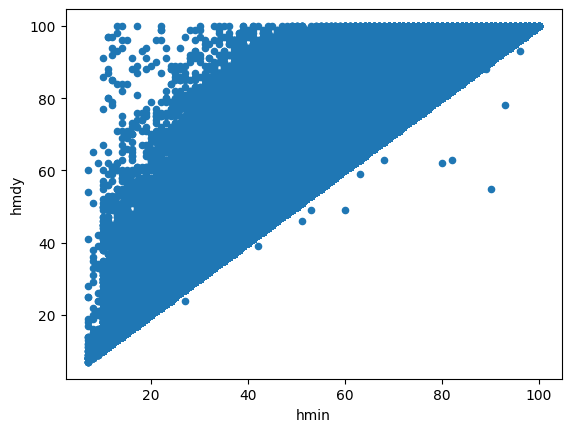

In [42]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [43]:
hmdy_hmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['hmdy'][i]
    x = new_df['hmin'][i]
    if y > x + 70:
        hmdy_hmin_out_liers.append(i)
    if y < x - 3:
        hmdy_hmin_out_liers.append(i)

new_df = new_df.drop(hmdy_hmin_out_liers)
new_df = new_df.reset_index(drop=True)

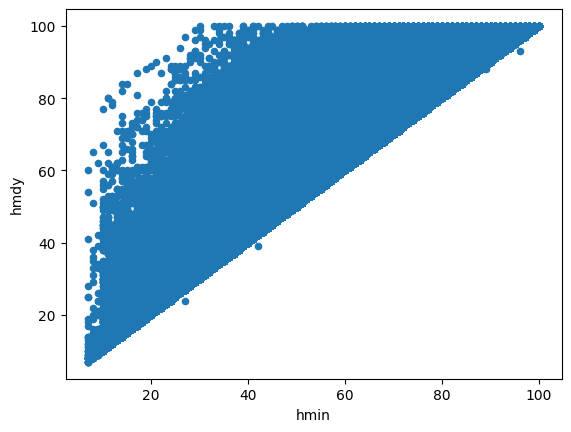

In [44]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [45]:
missing_percentages = new_df.isna().mean() * 100
print(missing_percentages)

index     0.000000
date      0.000000
hour      0.000000
prcp     10.034495
stp       7.523287
smax      7.569093
smin      7.568908
gbrd     49.155679
temp      7.590075
dewp      9.354907
tmax      7.604679
tmin      7.606468
dmax      9.366653
dmin      9.447890
hmax      9.363561
hmin      9.542087
hmdy      9.452664
wdct      9.554474
gust      9.417019
wdsp      9.373449
regi      0.000000
prov      0.000000
wsnm      0.000000
inme      0.000000
lat       0.000000
lon       0.000000
elvt      0.000000
dtype: float64


In [46]:
df_mean =  new_df.drop(['index', 'hour', 'gbrd', 'smax', 'smin', 'tmin', 'tmax', 'dmax', 'dmin', 'hmax', 'hmin', 'dewp', 'gust'], axis=1)
#df_mean =  df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt'])[['prcp', 'temp', 'hmdy', 'wdct', 'wdsp', 'stp']].mean()
df_mean = df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt']).agg({'prcp': 'mean', 'stp': 'mean', 'temp': 'mean', 'hmdy': 'mean', 'wdct': 'mean', 'wdsp': 'mean'}).reset_index()

In [47]:
missing_percentages = df_mean.isna().mean() * 100
print(missing_percentages)

date    0.000000
inme    0.000000
regi    0.000000
prov    0.000000
wsnm    0.000000
lat     0.000000
lon     0.000000
elvt    0.000000
prcp    7.864198
stp     5.072141
temp    5.157781
hmdy    6.033785
wdct    7.088536
wdsp    6.885753
dtype: float64


In [48]:
df_sorted = df_mean.sort_values(by=['inme', 'date'])

In [49]:
df_interpolated = df_sorted.interpolate()
missing_percentages = df_interpolated.isna().mean() * 100
print(missing_percentages)

date    0.0
inme    0.0
regi    0.0
prov    0.0
wsnm    0.0
lat     0.0
lon     0.0
elvt    0.0
prcp    0.0
stp     0.0
temp    0.0
hmdy    0.0
wdct    0.0
wdsp    0.0
dtype: float64


In [50]:
df_interpolated.to_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/south_new.csv', index=False)

In [51]:
print("hi")

hi
